In [1]:
import ROOT as rt

Welcome to JupyROOT 6.18/04


In [2]:
canvas = rt.TCanvas("canvas")
rt.gStyle.SetOptStat(0)
rt.gStyle.SetOptFit(1)

# Change the canvas margins so you can see all of the axis titles...
canvas.SetRightMargin(0.09)
canvas.SetLeftMargin(0.15)
canvas.SetBottomMargin(0.15)

In [4]:
input_file = rt.TFile('../online/AnalysisResults.root')
object_list = input_file.Get("h-lambda")

In [26]:
object_list.FindObject("fDphiHLambda").GetAxis(0).SetRangeUser(4, 8)
object_list.FindObject("fDphiHLambdaV0").GetAxis(0).SetRangeUser(4, 8)
object_list.FindObject("fDphiHLambdaRotated").GetAxis(0).SetRangeUser(4, 8)


object_list.FindObject("fDphiHLambda").GetAxis(1).SetRangeUser(2, 4)
object_list.FindObject("fDphiHLambdaV0").GetAxis(1).SetRangeUser(2, 4)
object_list.FindObject("fDphiHLambdaRotated").GetAxis(1).SetRangeUser(2, 4)

In [27]:
lambda_mass = object_list.FindObject("fDphiHLambda").Projection(4)
lambda_mass_v0 = object_list.FindObject("fDphiHLambdaV0").Projection(4)
lambda_mass_rotated = object_list.FindObject("fDphiHLambdaRotated").Projection(4)

lambda_mass.Rebin(2)
lambda_mass_v0.Rebin(2)
lambda_mass_rotated.Rebin(2)

lambda_mass.Sumw2()
lambda_mass_v0.Sumw2()
lambda_mass_rotated.Sumw2()

Warning in <TFile::Append>: Replacing existing TH1: fDphiHLambda_proj_4 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: fDphiHLambdaV0_proj_4 (Potential memory leak).


In [22]:
lambda_mass.SetTitle("p-#pi^{-} Invariant Mass")
lambda_mass.GetXaxis().SetTitle("Mass (GeV/c^{2})")
lambda_mass.GetYaxis().SetTitle("dN_{p-#pi^{-}}/dM")
lambda_mass.SetLineColor(rt.kBlue)

lambda_mass_rotated.SetTitle("p-#pi^{-} Rotated Invariant Mass")
lambda_mass_rotated.GetXaxis().SetTitle("Mass (GeV/c^{2})")
lambda_mass_rotated.GetYaxis().SetTitle("dN_{p-#pi^{-}}/dM")
lambda_mass._rotatedSetLineColor(rt.kMagenta)

lambda_mass_v0.SetTitle("p-#pi^{-} Invariant Mass (using V^{0} finder)")
lambda_mass_v0.GetXaxis().SetTitle("Mass (GeV/c^{2})")
lambda_mass_v0.GetYaxis().SetTitle("dN_{p-#pi^{-}}/dM")
lambda_mass_v0.SetLineColor(rt.kGreen+3)

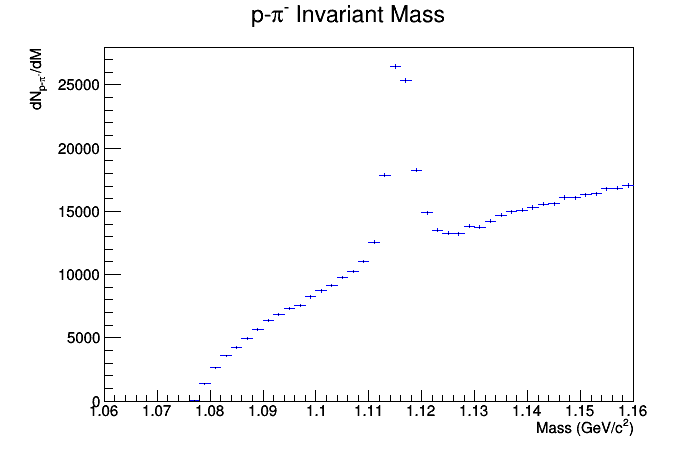

In [23]:
lambda_mass.Draw()
canvas.Draw()

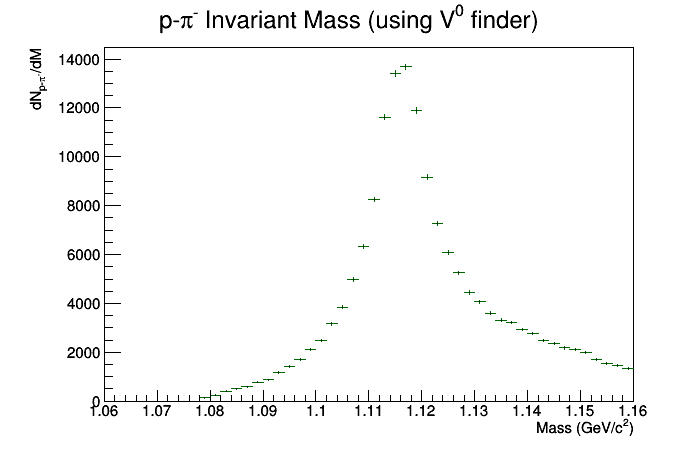

In [25]:
lambda_mass_v0.Draw()
canvas.Draw()

In [28]:
left_bin = lambda_mass.FindBin(1.135)
right_bin = lambda_mass.FindBin(1.155)

rot_scale = lambda_mass.Integral(left_bin, right_bin)/lambda_mass_rotated.Integral(left_bin, right_bin)
lambda_mass_rotated.Scale(rot_scale)

In [34]:
pol_fit = rt.TF1("polfit","pol2(0)", 1.09, 1.15)
lambda_mass_rotated.Fit(pol_fit, "RS")


****************************************
Minimizer is Linear
Chi2                      =      115.872
NDf                       =           27
p0                        = -1.95489e+06   +/-   29264.9     
p1                        =  3.34727e+06   +/-   52355.3     
p2                        =  -1.4203e+06   +/-   23411.3     


In [35]:
voigt_fit = rt.TF1("voigt_fit", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.15)

voigt_fit.SetParameter(0, 1.36753e02)
voigt_fit.SetParameter(1, 1.11581)
voigt_fit.SetParameter(2, 1.00576e-05 )
voigt_fit.SetParameter(3, 6.04166e-03)
voigt_fit.SetParameter(4, pol_fit.GetParameter(0))
voigt_fit.SetParameter(5, pol_fit.GetParameter(1))
voigt_fit.SetParameter(6, pol_fit.GetParameter(2))

voigt_fit.SetNpx(1000)
voigt_fit.SetLineColor(rt.kGreen+3)

lambda_mass.Fit(voigt_fit, "RS")

 FCN=142.931 FROM HESSE     STATUS=NOT POSDEF     60 CALLS         832 TOTAL
                     EDM=1.91162e-09    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.30515e+02   1.25429e+00   9.62969e-04   5.36402e-05
   2  p1           1.11588e+00   1.88590e-05   2.66046e-07  -6.46253e-01
   3  p2           7.24870e-06   1.08079e-06   1.21548e-04   4.75373e-05
   4  p3           4.60374e-03   6.28362e-05   5.30558e-08  -9.00147e-01
   5  p4          -5.74966e+05   2.71223e+02   1.37083e-01  -8.99926e-07
   6  p5           8.73690e+05   2.56779e+02   2.08304e-01  -9.78418e-07
   7  p6          -3.12514e+05   2.17770e+02   7.45091e-02  -1.06417e-06


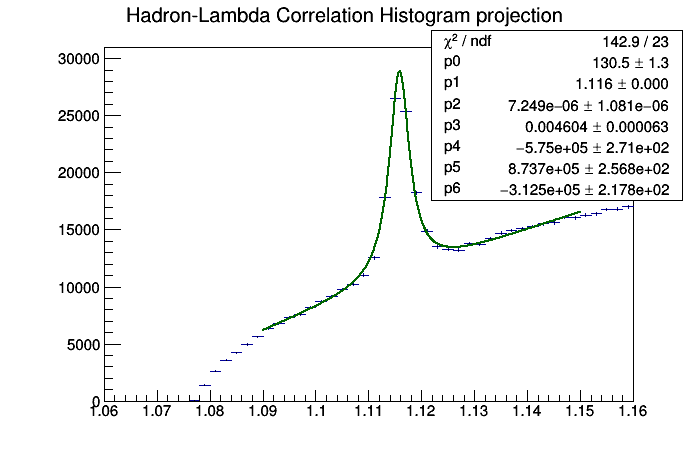

In [38]:
lambda_mass.GetYaxis().SetRangeUser(0, 31000)
lambda_mass.Draw()
canvas.Draw()

In [41]:
voigt_fit_v0 = rt.TF1("voigt_fit_v0", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.15)

voigt_fit_v0.SetParameter(0, 1.36753e02)
voigt_fit_v0.SetParameter(1, 1.11581)
voigt_fit_v0.SetParameter(2, 1.00576e-05 )
voigt_fit_v0.SetParameter(3, 6.04166e-03)
voigt_fit_v0.SetParameter(4, pol_fit.GetParameter(0))
voigt_fit_v0.SetParameter(5, pol_fit.GetParameter(1))
voigt_fit_v0.SetParameter(6, pol_fit.GetParameter(2))

voigt_fit_v0.SetNpx(1000)
voigt_fit_v0.SetLineColor(rt.kMagenta)

lambda_mass_v0.Fit(voigt_fit_v0, "RS")

 FCN=117.562 FROM MIGRAD    STATUS=FAILED       1270 CALLS        1271 TOTAL
                     EDM=0.0747319    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.16875e+02   1.37577e+00   0.00000e+00   5.36612e-02
   2  p1           1.11624e+00   2.78268e-05  -0.00000e+00   1.70503e+03
   3  p2           4.74477e-06   1.28802e-10   0.00000e+00  -2.44076e+09
   4  p3           1.15605e-02   8.29989e-05   0.00000e+00  -6.98599e+02
   5  p4          -1.88579e+06   1.71143e+02  -0.00000e+00   4.39918e-03
   6  p5           3.34457e+06   7.25824e+00  -0.00000e+00   5.10361e-03
   7  p6          -1.48112e+06   1.38297e+02   0.00000e+00   5.91277e-03


Warning in <Fit>: Abnormal termination of minimization.


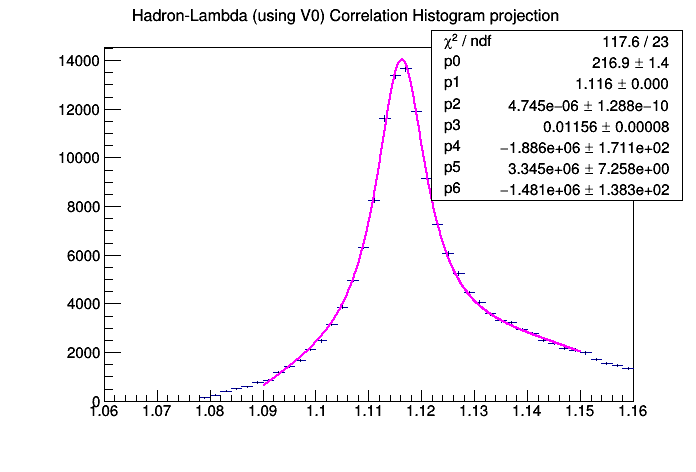

In [42]:
lambda_mass_v0.Draw()
canvas.Draw()